In [4]:
import splitfolders
splitfolders.ratio("sidedata", output="sidedataset", seed=1337, ratio=(0.8, 0.2))

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=10,
                    horizontal_flip=True,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [6]:
train_dir = 'sidedataset/train'
validation_dir = 'sidedataset/val/'

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')

Found 632 images belonging to 5 classes.
Found 161 images belonging to 5 classes.


In [43]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='LeakyReLU', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (5,5), activation='LeakyReLU'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (7,7), activation='LeakyReLU'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='LeakyReLU'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [44]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 70, 70, 64)        51264     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 35, 35, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 29, 29, 64)       

In [45]:
history = model.fit(
      train_generator,
      batch_size=32,
      epochs=10, 
      validation_data=validation_generator,
      verbose=2)

Epoch 1/10
158/158 - 14s - loss: 1.2496 - accuracy: 0.5063 - val_loss: 0.2724 - val_accuracy: 0.8385 - 14s/epoch - 89ms/step
Epoch 2/10
158/158 - 13s - loss: 0.4158 - accuracy: 0.8718 - val_loss: 0.0577 - val_accuracy: 0.9876 - 13s/epoch - 82ms/step
Epoch 3/10
158/158 - 13s - loss: 0.2205 - accuracy: 0.9288 - val_loss: 0.1929 - val_accuracy: 0.9565 - 13s/epoch - 83ms/step
Epoch 4/10
158/158 - 14s - loss: 0.1973 - accuracy: 0.9399 - val_loss: 0.0530 - val_accuracy: 0.9876 - 14s/epoch - 86ms/step
Epoch 5/10
158/158 - 14s - loss: 0.3970 - accuracy: 0.9146 - val_loss: 0.0124 - val_accuracy: 0.9938 - 14s/epoch - 86ms/step
Epoch 6/10
158/158 - 13s - loss: 1.7406 - accuracy: 0.8576 - val_loss: 1.0871 - val_accuracy: 0.9068 - 13s/epoch - 85ms/step
Epoch 7/10
158/158 - 13s - loss: 7.2548 - accuracy: 0.8006 - val_loss: 0.3263 - val_accuracy: 0.9814 - 13s/epoch - 85ms/step
Epoch 8/10
158/158 - 14s - loss: 0.5309 - accuracy: 0.9193 - val_loss: 0.0645 - val_accuracy: 0.9689 - 14s/epoch - 86ms/step


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


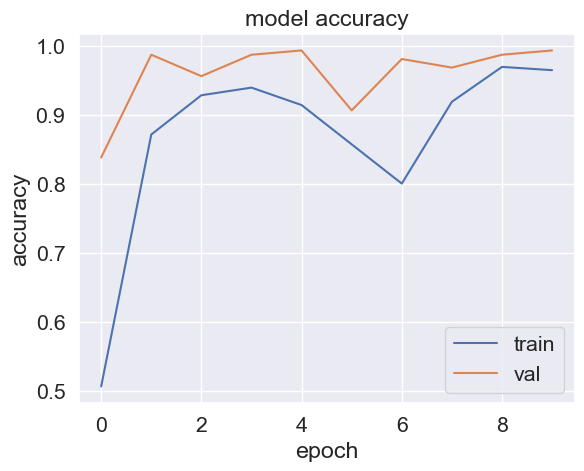

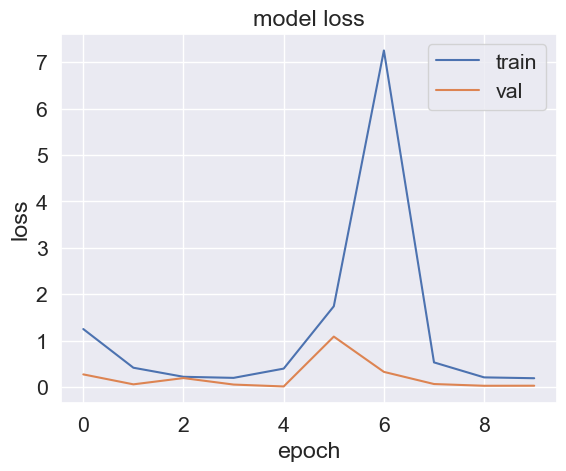

In [46]:
print(history.history.keys())
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

41/41 [==============================] - 1s 20ms/step


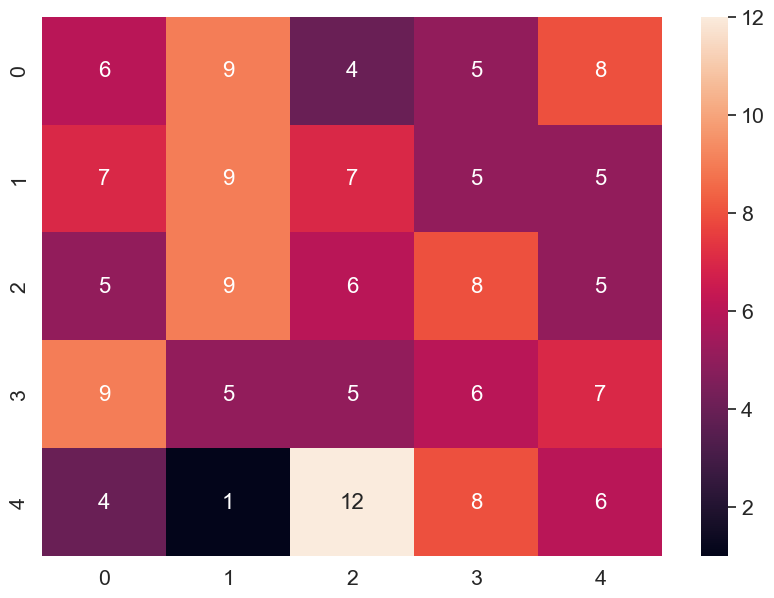

              precision    recall  f1-score   support

         3a1       0.19      0.19      0.19        32
         3a2       0.27      0.27      0.27        33
         3b2       0.18      0.18      0.18        33
         lab       0.19      0.19      0.19        32
      pantry       0.19      0.19      0.19        31

    accuracy                           0.20       161
   macro avg       0.20      0.20      0.20       161
weighted avg       0.21      0.20      0.21       161

[[ 6  9  4  5  8]
 [ 7  9  7  5  5]
 [ 5  9  6  8  5]
 [ 9  5  5  6  7]
 [ 4  1 12  8  6]]
0.20496894409937888


In [47]:
import numpy
from sklearn import metrics
import seaborn as sn
import pandas as pd
import math

# test_generator = ImageDataGenerator(
#                     rescale=1./255)
# test_data_generator = test_generator.flow_from_directory(
#     validation_dir,
#     target_size=(150, 150),
#     batch_size=32,
#     shuffle=True)

test_data_generator = validation_generator
test_steps_per_epoch = math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict(test_data_generator, steps=test_steps_per_epoch)

predicted_classes = numpy.argmax(predictions, axis=1)
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
confusion = metrics.confusion_matrix(true_classes, predicted_classes)
accuracy = metrics.accuracy_score(true_classes, predicted_classes)

df_cm = pd.DataFrame(confusion, range(5), range(5))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})

plt.show()
print(report)
print(confusion) 
print(accuracy) 